In [3]:
import pandas as pd
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 4)

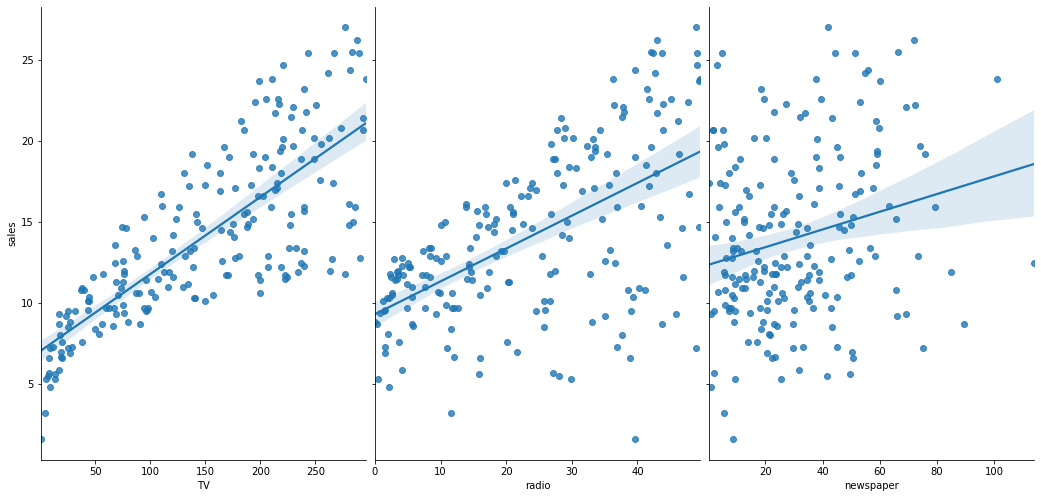

In [11]:
import seaborn as sns

sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.7, kind='reg')

In [12]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]

X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
X.shape

(200, 3)

In [16]:
Y = data[['sales']]
Y.head()

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [17]:
Y.shape

(200, 1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(150, 3)
(50, 3)
(150, 1)
(50, 1)


In [21]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

LinearRegression()

In [22]:
print(linreg.intercept_)
print(linreg.coef_)

[2.87696662]
[[0.04656457 0.17915812 0.00345046]]


In [29]:
zip(feature_cols, linreg.coef_)


In [24]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


In [25]:
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)
print(metrics.mean_squared_error(true, pred))

150.0
150.0


In [26]:
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


In [31]:
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

1.4046514230328955


In [33]:
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888
